In [2]:
"""

Dataset Attributes

'ID', 'Latitude', 'Longitude', 'Day', 'Hour', 'Minute', 'Duration', 'RemainingTime', 'Resources', 'Coverage', 'Legitimacy', 'OnPeakHours', 'GridNumber'

'latitude' and 'longitude': task location
'Day', 'Hour' and 'Minute': task publish time 
'Duration': task active duration in minutes
'Remaining time': the residual time of a sensing task till its completion 
'Resources': replaces percentage of battery required to complete a task
'Coverage': task sensing distance 
'Legitimacy': whether a task is illegitimate one or legitimate one (This feature is used only in training of the machine learning models as the MCS platform is unaware of task legitimacy when a task is submitted)
'GridNumber': obtained by splitting sensing city map to small grids with numbers beginning at 1.
'OnpeakHour': a binary flag to indicate if task start time occurs during 7am to 11am
 We define 7am to 11am as the peak hour and other hours are non-peak for the sake of simplicity in simulations. 

"""

"\n\nDataset Attributes\n\n'ID', 'Latitude', 'Longitude', 'Day', 'Hour', 'Minute', 'Duration', 'RemainingTime', 'Resources', 'Coverage', 'Legitimacy', 'OnPeakHours', 'GridNumber'\n\n'latitude' and 'longitude': task location\n'Day', 'Hour' and 'Minute': task publish time \n'Duration': task active duration in minutes\n'Remaining time': the residual time of a sensing task till its completion \n'Resources': replaces percentage of battery required to complete a task\n'Coverage': task sensing distance \n'Legitimacy': whether a task is illegitimate one or legitimate one (This feature is used only in training of the machine learning models as the MCS platform is unaware of task legitimacy when a task is submitted)\n'GridNumber': obtained by splitting sensing city map to small grids with numbers beginning at 1.\n'OnpeakHour': a binary flag to indicate if task start time occurs during 7am to 11am\n We define 7am to 11am as the peak hour and other hours are non-peak for the sake of simplicity in 

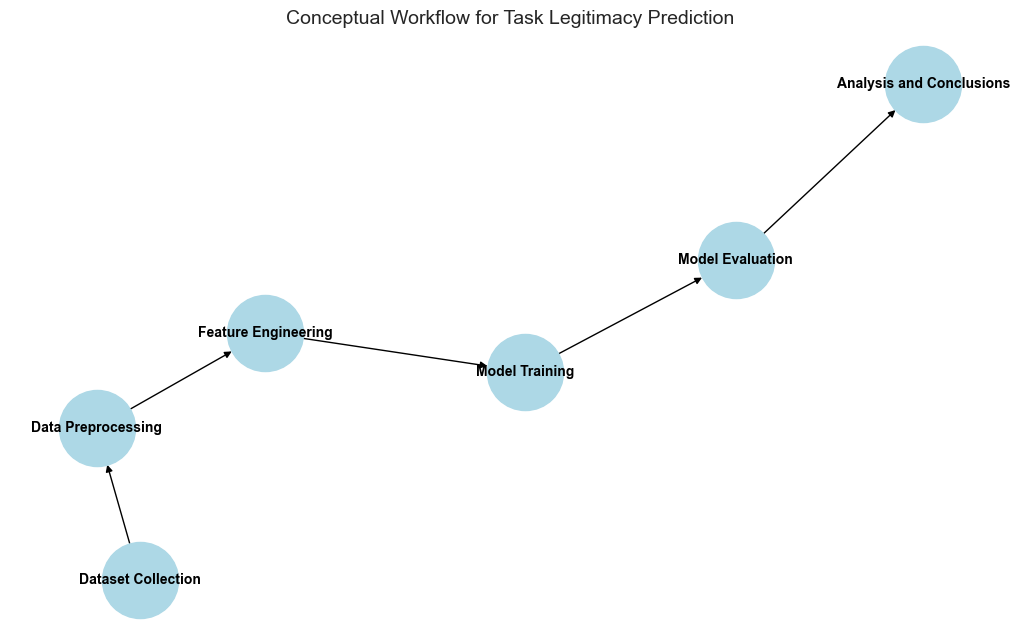

In [3]:
"""
Slide 1: Problem’s Overview

Predicting the legitimacy of tasks in a Mobile CrowdSensing platform.
"""

import matplotlib.pyplot as plt
import networkx as nx

# Define workflow steps
workflow = [
    "Dataset Collection",
    "Data Preprocessing",
    "Feature Engineering",
    "Model Training",
    "Model Evaluation",
    "Analysis and Conclusions"
]

# Create a directed graph
G = nx.DiGraph()
for i in range(len(workflow) - 1):
    G.add_edge(workflow[i], workflow[i + 1])

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
plt.title("Conceptual Workflow for Task Legitimacy Prediction", fontsize=14)
plt.show()

/var/folders/6p/l_p0f_hx17z8ycf9gxdq5j0r0000gn/T/ipykernel_40833/662468636.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_cleaned['Legitimacy'], palette='viridis')


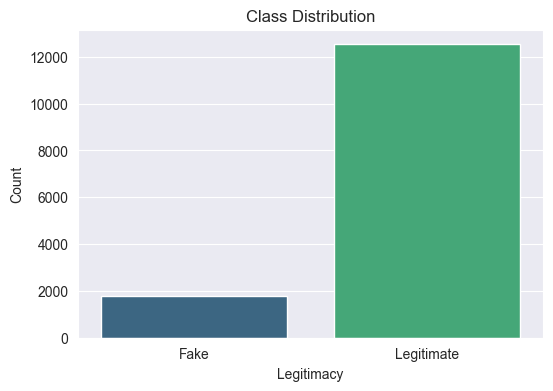

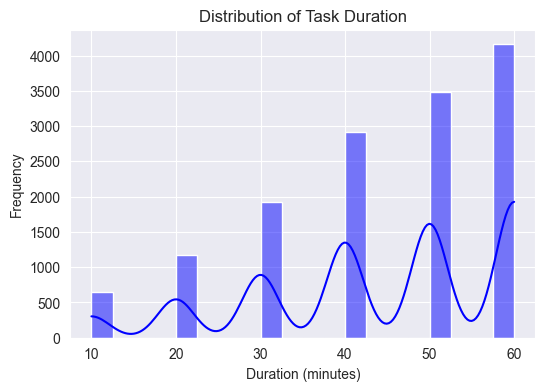

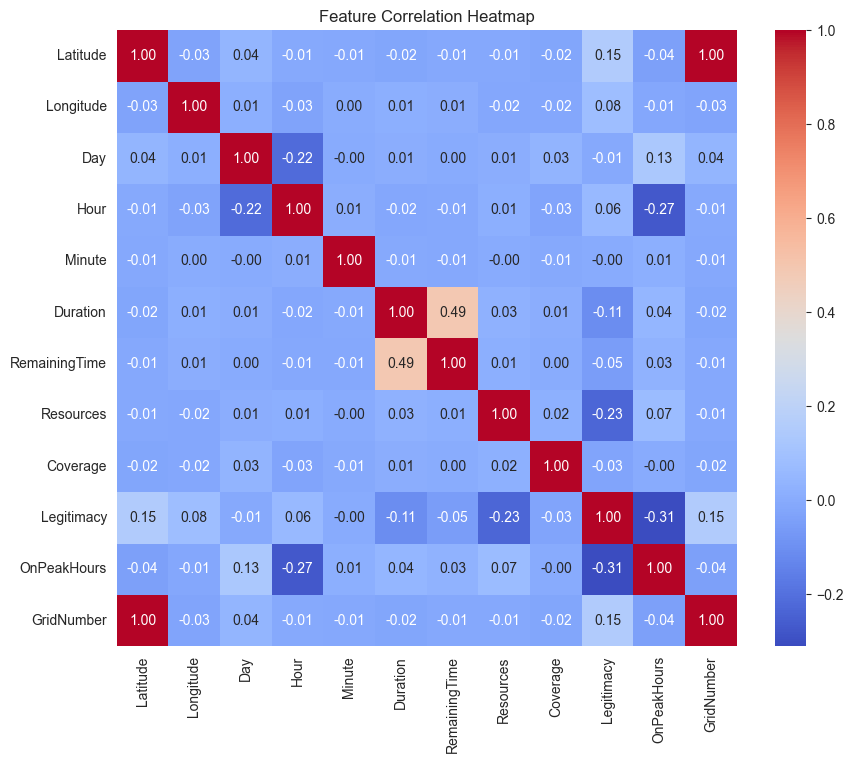

In [4]:
"""
Slide 2: Dataset’s Overview (EDA)

1. Features with High Correlations
a. Latitude and GridNumber: these two features have a very high positive correlation (0.9999), indicating that they are almost identical in how they vary.
b. Duration and Remaining Time: highly correlated, one of them might be redundant for predictive modeling.

2. Features Correlated with Legitimacy (These features have weak positive correlations but might still contribute to the model when combined with others)
a. Positively Correlated Features:
    • GridNumber: 0.151
	• Latitude: 0.151
	• Longitude: 0.082
	• Hour: 0.059
b. Negatively Correlated Features:
	• OnPeakHours: -0.311 (moderate negative correlation)
	• Resources: -0.231 (weak negative correlation)
	• Duration: -0.110 (weak negative correlation)
	• RemainingTime: -0.054 (very weak negative correlation)
c. Features with Little to No Correlation (These features show negligible correlation with Legitimacy and may not be helpful predictors):
	• Minute: -0.001
	• Day: -0.005
	• Coverage: -0.029
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = 'data/MCS_dataset.csv'
data = pd.read_csv(file_path)

# Remove the 'ID' attribute
data_cleaned = data.drop(columns=['ID'])

# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=data_cleaned['Legitimacy'], palette='viridis')
plt.title("Class Distribution")
plt.xlabel("Legitimacy")
plt.ylabel("Count")
plt.xticks([0, 1], ['Fake', 'Legitimate'])
plt.show()

# Distribution of task duration
plt.figure(figsize=(6, 4))
sns.histplot(data_cleaned['Duration'], bins=20, kde=True, color='blue')
plt.title("Distribution of Task Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

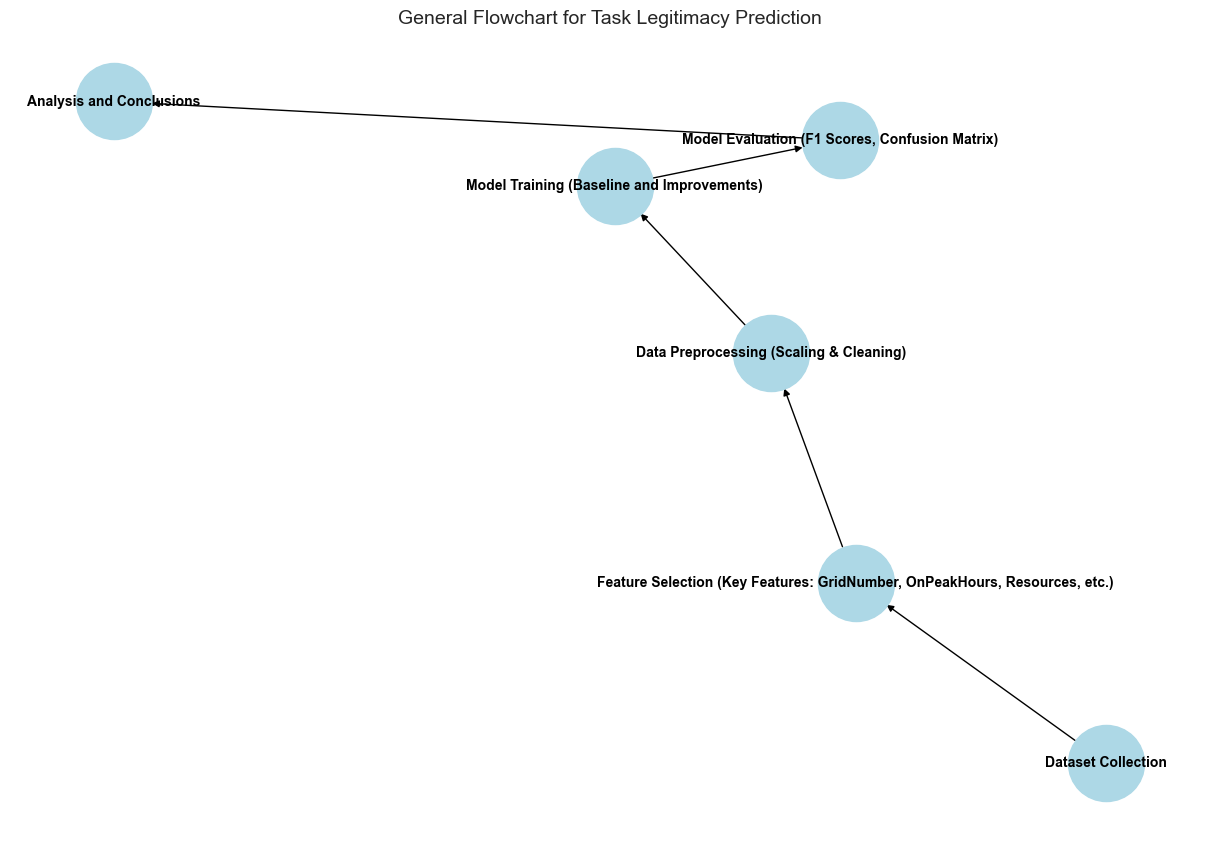

In [5]:
"""
Slide 3: General Flowchart
"""

import matplotlib.pyplot as plt
import networkx as nx

# Define updated workflow steps
workflow = [
    "Dataset Collection",
    "Feature Selection (Key Features: GridNumber, OnPeakHours, Resources, etc.)",
    "Data Preprocessing (Scaling & Cleaning)",
    "Model Training (Baseline and Improvements)",
    "Model Evaluation (F1 Scores, Confusion Matrix)",
    "Analysis and Conclusions"
]

# Create a directed graph for the flowchart
G = nx.DiGraph()
for i in range(len(workflow) - 1):
    G.add_edge(workflow[i], workflow[i + 1])

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=3000,
    node_color='lightblue',
    font_size=10,
    font_weight='bold'
)
plt.title("General Flowchart for Task Legitimacy Prediction", fontsize=14)
plt.show()

/Users/rocker/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


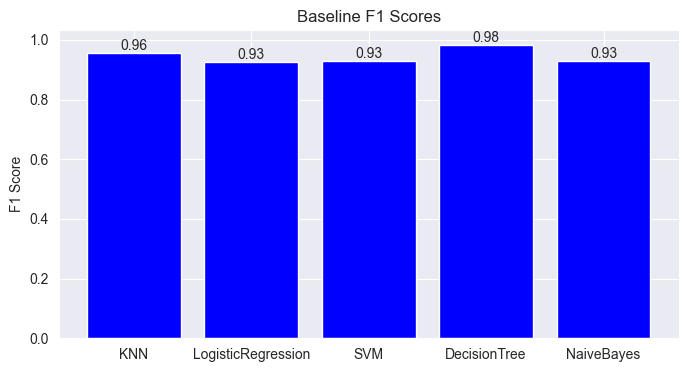

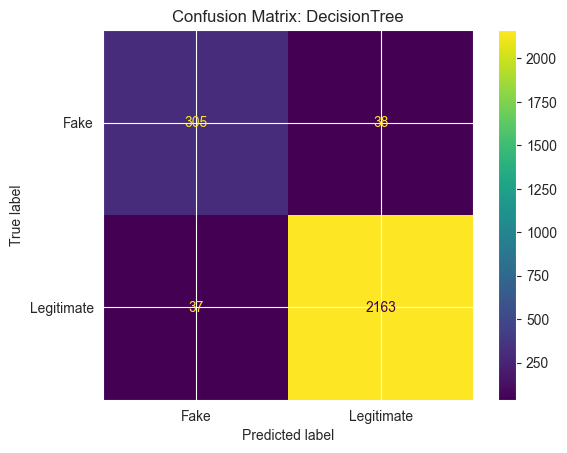

In [6]:
"""
Q1: Obtain a Baseline Performance
Train models and compare F1 scores, generating a confusion matrix for the best model.
"""

from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Train-test split using Day attribute
train_data = data_cleaned[data_cleaned['Day'] <= 4]
test_data = data_cleaned[data_cleaned['Day'] > 4]

# Train-test split using all features except 'ID'
X_train = train_data.drop(columns=['Legitimacy'])
y_train = train_data['Legitimacy']
X_test = test_data.drop(columns=['Legitimacy'])
y_test = test_data['Legitimacy']

# Initialize models
models = {
    "KNN": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(),
    "SVM": SVC(),
    "DecisionTree": DecisionTreeClassifier(),
    "NaiveBayes": GaussianNB()
}

# Train and evaluate
f1_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_scores[name] = f1_score(y_test, y_pred)

# Plot F1 scores
plt.figure(figsize=(8, 4))
bars = plt.bar(f1_scores.keys(), f1_scores.values(), color='blue')
plt.title("Baseline F1 Scores")
plt.ylabel("F1 Score")

# Adding text on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom')

plt.show()

# Confusion matrix for the best model
best_model_name = max(f1_scores, key=f1_scores.get)
best_model = models[best_model_name]
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Fake", "Legitimate"]).plot()
plt.title(f"Confusion Matrix: {best_model_name}")
plt.show()

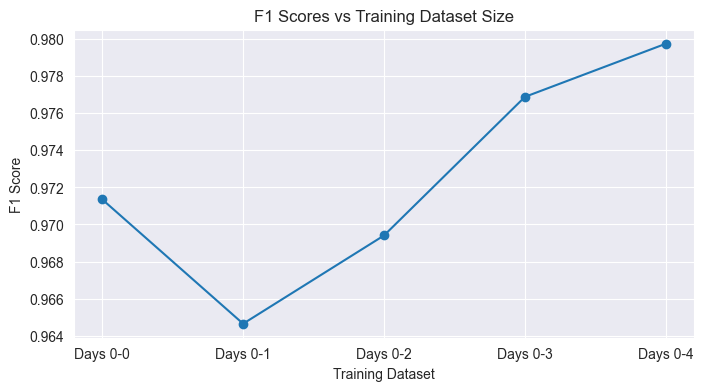

In [7]:
"""
Q2: Data Size Analysis

Train the best model with progressively larger training datasets and compare F1 scores.
"""

f1_scores_data_size = []
days = [0, 1, 2, 3, 4]

for i in range(1, len(days) + 1):
    subset = train_data[train_data['Day'].isin(days[:i])]
    X_subset = subset.drop(columns=['Legitimacy'])
    y_subset = subset['Legitimacy']
    
    best_model.fit(X_subset, y_subset)
    y_pred = best_model.predict(X_test)
    f1_scores_data_size.append(f1_score(y_test, y_pred))

# Plot F1 scores
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(days) + 1), f1_scores_data_size, marker='o')
plt.xticks(range(1, len(days) + 1), [f"Days 0-{i}" for i in range(len(days))])
plt.title("F1 Scores vs Training Dataset Size")
plt.xlabel("Training Dataset")
plt.ylabel("F1 Score")
plt.show()

/Users/rocker/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rocker/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

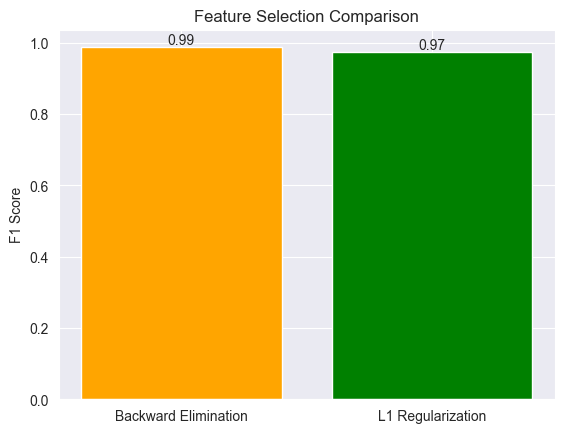

In [8]:
"""
Q3: Feature Engineering

Use feature selection techniques (e.g., Backward Elimination and L1 Regularization) to improve performance.
"""
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Backward Elimination using RFE
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Train and evaluate
best_model.fit(X_train_rfe, y_train)
f1_rfe = f1_score(y_test, best_model.predict(X_test_rfe))

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# L1 Regularization
lasso = LogisticRegression(penalty='l1', solver='liblinear', C=0.01)
lasso.fit(X_train_scaled, y_train)

# Get selected features
selected_features = (lasso.coef_ != 0).ravel()
X_train_lasso = X_train.loc[:, selected_features]
X_test_lasso = X_test.loc[:, selected_features]

# Train and evaluate
best_model.fit(X_train_lasso, y_train)
f1_lasso = f1_score(y_test, best_model.predict(X_test_lasso))

# Compare methods
bars = plt.bar(["Backward Elimination", "L1 Regularization"], [f1_rfe, f1_lasso], color=['orange', 'green'])
plt.title("Feature Selection Comparison")
plt.ylabel("F1 Score")

# Adding text on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom')

plt.show()

In [9]:
selected_features_rfe = [feature for feature, selected in zip(X_train.columns, rfe.support_) if selected]
selected_features_rfe

['Latitude', 'Longitude', 'Day', 'Resources', 'OnPeakHours']

/Users/rocker/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


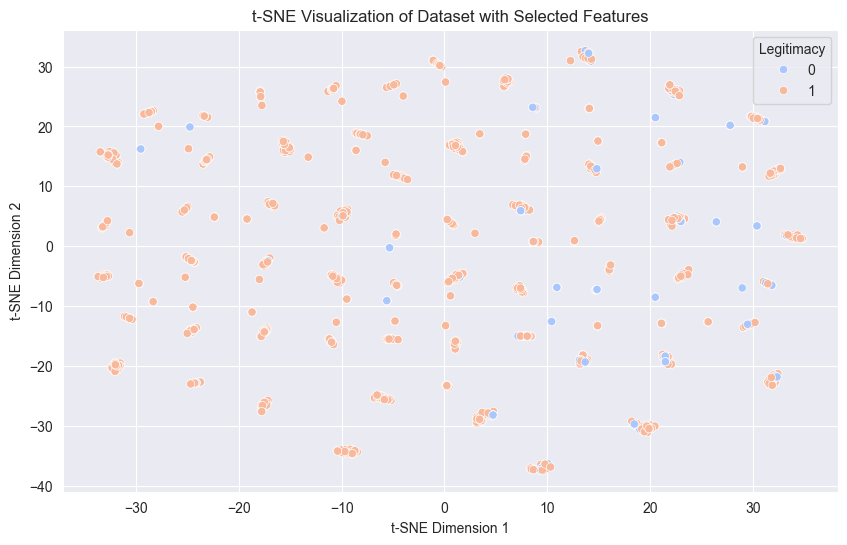

In [10]:
"""
Slide 4: Visualizing Training and Test Sets

Use t-SNE to visualize the training and test datasets after feature selection.
"""

from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Select updated features
X = data_cleaned[selected_features_rfe]
y = data_cleaned['Legitimacy']

# Subsample to reduce computational load
X_sample, y_sample = resample(X, y, n_samples=2000, random_state=42)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500)
X_tsne = tsne.fit_transform(X_sample)

# Plot t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_sample, palette='coolwarm')
plt.title("t-SNE Visualization of Dataset with Selected Features")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Legitimacy")
plt.show()

/var/folders/6p/l_p0f_hx17z8ycf9gxdq5j0r0000gn/T/ipykernel_40833/886591376.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['SOM_X'], train_data['SOM_Y'] = zip(*train_som)
/var/folders/6p/l_p0f_hx17z8ycf9gxdq5j0r0000gn/T/ipykernel_40833/886591376.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['SOM_X'], test_data['SOM_Y'] = zip(*test_som)
/var/folders/6p/l_p0f_hx17z8ycf9gxdq5j0r0000gn/T/ipykernel_40833/886591376.py:34: SettingWithCopyWarning: 
A value is trying to be set on a c

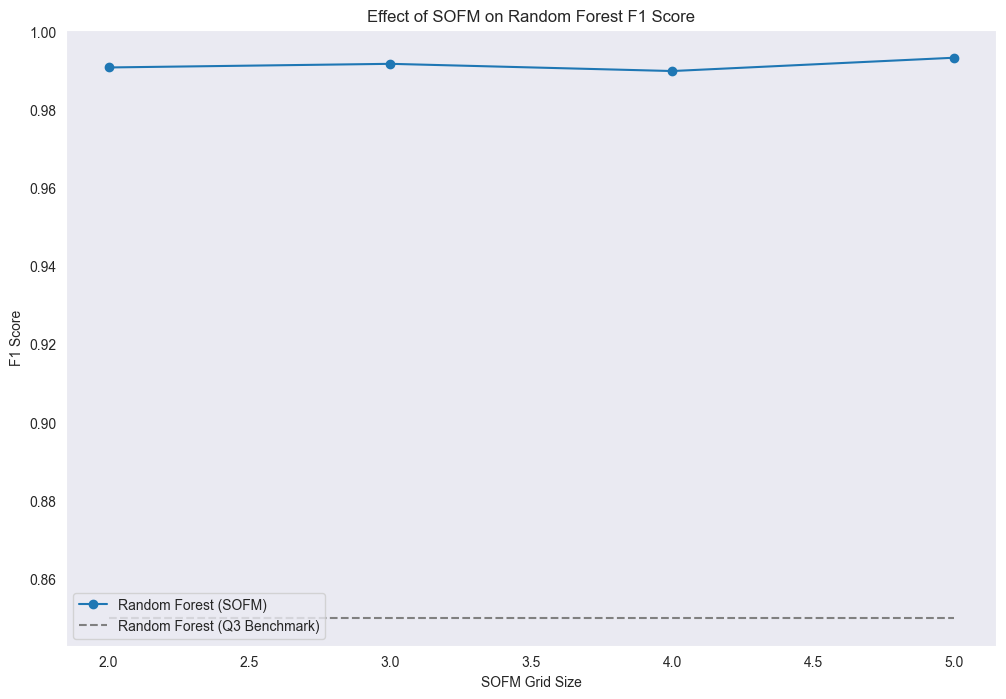

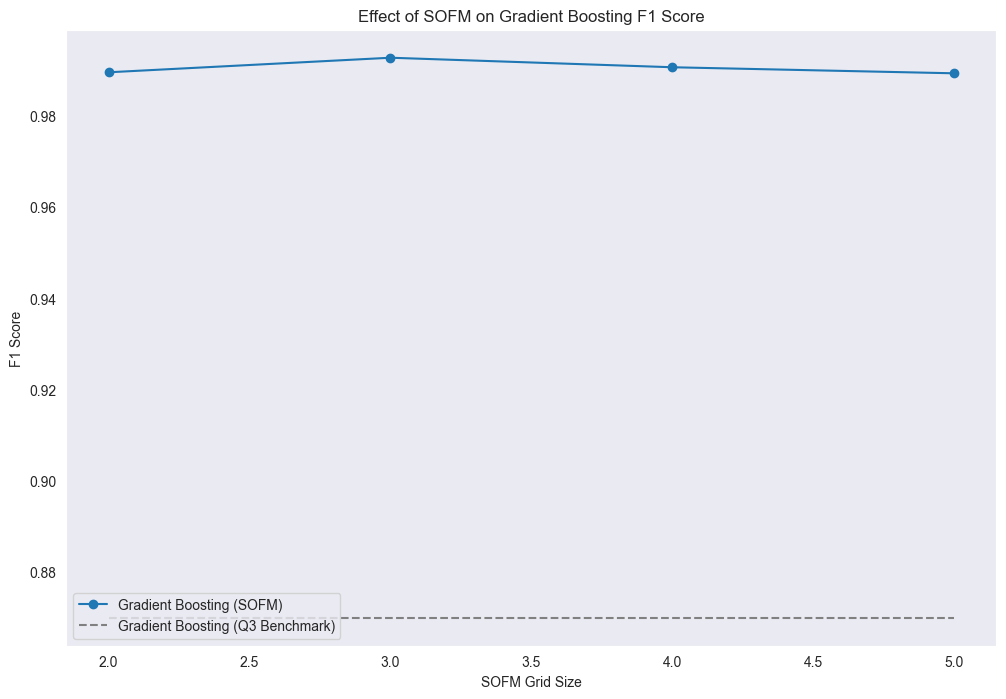

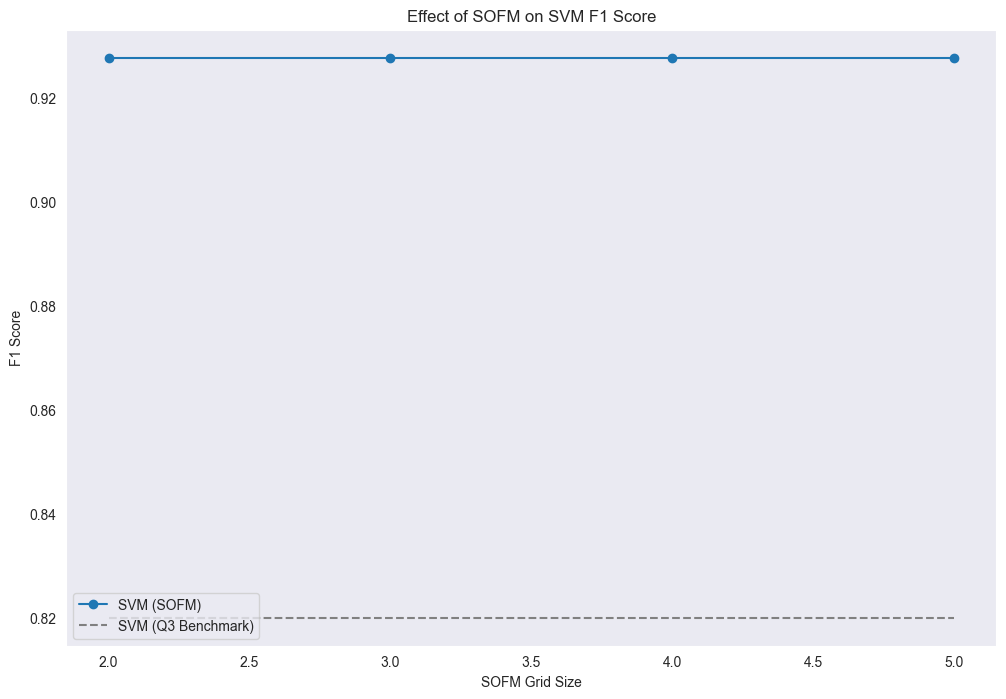

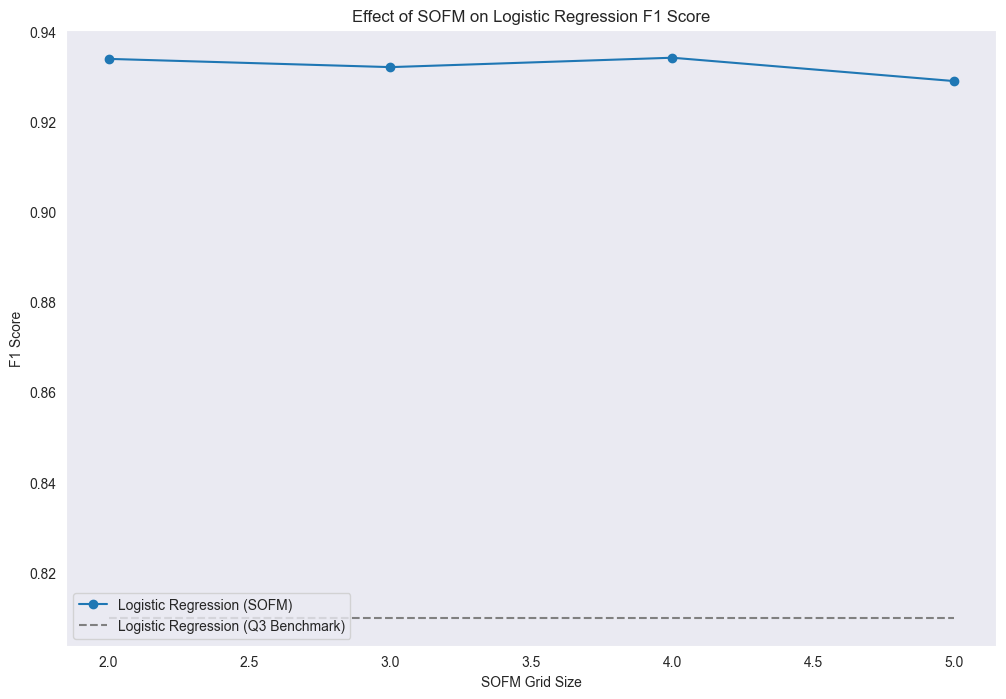

In [14]:
from minisom import MiniSom
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# SOFM grid sizes
grid_sizes = [2, 3, 4, 5]

# Models to evaluate
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

# Store F1 scores for each model
f1_scores = {model: [] for model in models.keys()}

# Loop through SOFM grid sizes
for grid in grid_sizes:
    # Initialize and train SOFM
    som = MiniSom(x=grid, y=grid, input_len=2, sigma=0.3, learning_rate=0.5)
    som.random_weights_init(train_data[['Latitude', 'Longitude']].values)
    som.train_random(data=train_data[['Latitude', 'Longitude']].values, num_iteration=100)
    
    # Map training and testing spatial features to SOFM clusters
    train_som = [som.winner(x) for x in train_data[['Latitude', 'Longitude']].values]
    test_som = [som.winner(x) for x in test_data[['Latitude', 'Longitude']].values]
    
    # Convert clusters to separate columns (x and y positions)
    train_data['SOM_X'], train_data['SOM_Y'] = zip(*train_som)
    test_data['SOM_X'], test_data['SOM_Y'] = zip(*test_som)
    
    # Update datasets with SOFM features
    X_train_augmented = train_data[selected_features_rfe + ['SOM_X', 'SOM_Y']]
    X_test_augmented = test_data[selected_features_rfe + ['SOM_X', 'SOM_Y']]
    y_train = train_data['Legitimacy']
    y_test = test_data['Legitimacy']
    
    # Train and evaluate each model
    for model_name, model in models.items():
        model.fit(X_train_augmented, y_train)
        y_pred = model.predict(X_test_augmented)
        f1_scores[model_name].append(f1_score(y_test, y_pred))

# Q3 benchmark F1 scores (replace with actual Q3 results)
q3_f1_scores = {'Random Forest': 0.85, 'Gradient Boosting': 0.87, 'SVM': 0.82, 'Logistic Regression': 0.81}

# Generate Figures
for model_name, scores in f1_scores.items():
    plt.figure(figsize=(12, 8))
    plt.plot(grid_sizes, scores, marker='o', label=f"{model_name} (SOFM)")
    plt.hlines(q3_f1_scores[model_name], xmin=grid_sizes[0], xmax=grid_sizes[-1],
               colors='gray', linestyles='dashed', label=f"{model_name} (Q3 Benchmark)")
    plt.title(f"Effect of SOFM on {model_name} F1 Score")
    plt.xlabel("SOFM Grid Size")
    plt.ylabel("F1 Score")
    plt.legend()
    plt.grid()
    plt.show()

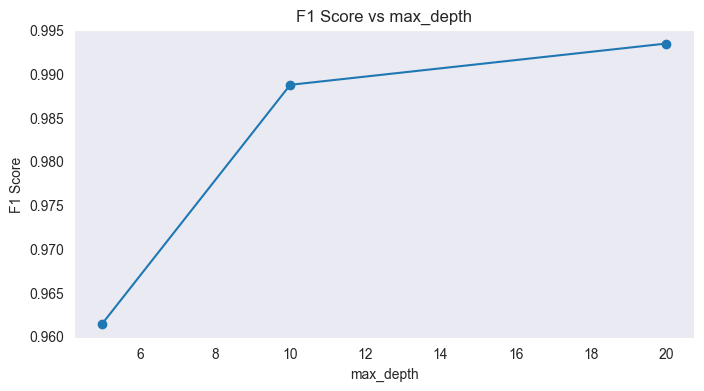

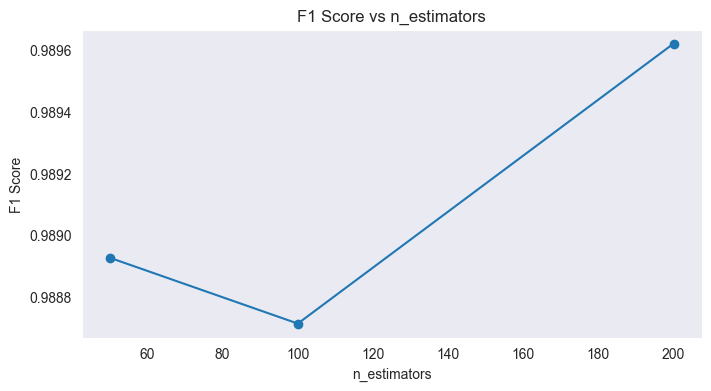

In [12]:
"""
Q5: Parameter Fine-Tuning

Optimize the parameters of the best-performing model from previous questions.
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Best model: Random Forest
best_model = RandomForestClassifier(random_state=42)

# Define parameter ranges
param_grid = {
    'max_depth': [5, 10, 20],  # Lower, default, higher
    'n_estimators': [50, 100, 200]  # Lower, default, higher
}

# Store results for each parameter
f1_scores_max_depth = []
f1_scores_n_estimators = []

# Evaluate max_depth
for max_depth in param_grid['max_depth']:
    model = RandomForestClassifier(max_depth=max_depth, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_scores_max_depth.append(f1_score(y_test, y_pred))

# Evaluate n_estimators
for n_estimators in param_grid['n_estimators']:
    model = RandomForestClassifier(max_depth=10, n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_scores_n_estimators.append(f1_score(y_test, y_pred))

# Plot F1 scores for max_depth
plt.figure(figsize=(8, 4))
plt.plot(param_grid['max_depth'], f1_scores_max_depth, marker='o')
plt.title("F1 Score vs max_depth")
plt.xlabel("max_depth")
plt.ylabel("F1 Score")
plt.grid()
plt.show()

# Plot F1 scores for n_estimators
plt.figure(figsize=(8, 4))
plt.plot(param_grid['n_estimators'], f1_scores_n_estimators, marker='o')
plt.title("F1 Score vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("F1 Score")
plt.grid()
plt.show()